In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mnist_utils as mu
import maths_utils as matu
import random

In [2]:
neuron = 'relu'
if neuron == 'relu':
    import relu_utils as alg
elif neuron == 'sig':
    import sigmoid_utils as alg
elif neuron == 'krelu':
    import kbrelu_utils as alg

In [3]:
train_x, train_y = mu.get_train_data()

../train-images.idx3-ubyte


In [4]:
#digit = 5
random.seed(0)
label_list = np.array(train_y).astype(int)
#index_digit = np.where(label_list==digit)[0]
index_digit = np.where(label_list>=0)[0]
train_num = len(index_digit)-1
index_train = index_digit[0:train_num]
Data_v = np.array(train_x[index_train]).astype(float)
Data_v = Data_v/255.
Labels = np.array(train_y[index_train]).astype(int)
Data_l = np.zeros((train_num, 10))
for i in range(train_num):
    Data_l[i, Labels[i]] = 1.

In [ ]:
def greedy_recon(dbnet, test):
    temp = test
    top_inputsize = dbnet['top']['v_num'] - dbnet['top']['label_n']
    for i in range(len(dbnet['layer'])):   #bottom up
        temp = alg.ReLU(temp, dbnet['layer'][i]['w'])
    top = alg.ReLU(temp, dbnet['top']['w'][:top_inputsize, :])
    label = alg.ReLU(top, np.transpose(dbnet['top']['w'][top_inputsize:, :]))
    temp = np.append(temp, label, axis=1)
    temp = alg.ReLU(temp, dbnet['top']['w'])
    temp = alg.ReLU(temp, np.transpose(dbnet['top']['w']))
    temp = temp[:top_inputsize]
    for i in range(len(dbnet['layer'])-1, -1, -1):   #up down
        temp = alg.ReLU(temp, np.transpose(dbnet['layer'][i]['w']))
    recon = temp
    mu.plot_digit(recon)
    predict = np.argmax(label)
    return predict, recon

In [ ]:
nodes = [784, 500, 500, 2000, 10]
bsize = 100
iteration = 50
dbnet = alg.init_label_dbn(Data_v, Data_l, nodes, eta=1e-3, batch_size=bsize, epoc=iteration)
dbnet = alg.greedy_train(dbnet)
dbnet['train_x']=[]
dbnet['train_y']=[]
predict, recon = alg.greedy_recon(dbnet, Data_v[0])
dbn_file = '%s_greedy_b%d_epoc%d'%(neuron, bsize, iteration)
alg.save_dict(dbnet, dbn_file)

test_x, test_y = mu.get_test_data()
index_digit = np.where(test_y>=0)[0]
train_num = len(index_digit)-1
index_train = index_digit[0:train_num]
test_v = np.array(test_x[index_train]).astype(float)
test_v = test_v/255.
test_l = np.array(test_y[index_train]).astype(int)
dbnet = alg.test_label_data(dbnet, test_v, test_l)
predict, result = alg.dbn_greedy_test(dbnet)
print np.where(result==False)[0].shape, np.where(result==1)[0].shape, np.where(result==-1)[0].shape

In [ ]:
#fine training
dbnet['train_x'] = Data_v
dbnet['train_y'] = Data_l
dbnet = alg.fine_train(dbnet)
predict, recon = alg.dbn_recon(dbnet, Data_v[0])
dbn_file = '%s_fine_b%d_epoc%d'%(neuron, bsize, iteration)
alg.save_dict(dbnet, dbn_file)
predict, result = alg.dbn_test(dbnet)
print np.where(result==False)[0].shape, np.where(result==1)[0].shape, np.where(result==-1)[0].shape

(1759,) (5676,) (2564,)


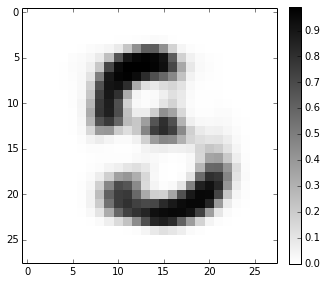

In [33]:
import sigmoid_utils as alg
random.seed(0)
dbnet = alg.load_dict('sig_fine_b10_epoc5')
predict, result = alg.dbn_test(dbnet)
print np.where(result==0)[0].shape, np.where(result==1)[0].shape, np.where(result==-1)[0].shape
test_x = dbnet['test_x']
test_y = dbnet['test_y']
predict, recon = alg.dbn_recon(dbnet, test_x[15])

(2119,) (5344,) (2536,)


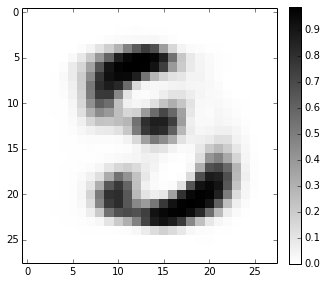

In [35]:
import sigmoid_utils as alg
random.seed(0)
dbnet = alg.load_dict('sig_greedy_b10_epoc5')
dbnet['test_x'] = test_x
dbnet['test_y'] = test_y
predict, result = alg.dbn_greedy_test(dbnet)
print np.where(result==0)[0].shape, np.where(result==1)[0].shape, np.where(result==-1)[0].shape
predict, recon = alg.greedy_recon(dbnet, test_x[15])

(703,) (9296,) (0,)
(703,) (9296,) (0,)


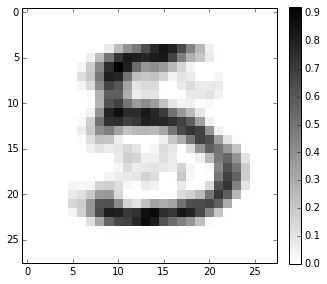

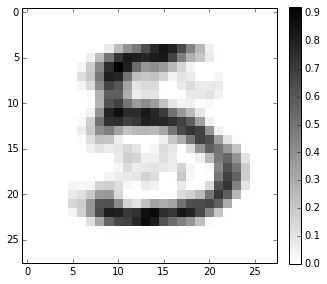

In [37]:
import relu_utils as alg
dbnet = alg.load_dict('b10_epoc5')

predict, result = alg.dbn_test(dbnet)
print np.where(result==0)[0].shape, np.where(result==1)[0].shape, np.where(result==-1)[0].shape
predict, recon = alg.dbn_recon(dbnet, test_x[15])

predict, result = alg.dbn_greedy_test(dbnet)
print np.where(result==0)[0].shape, np.where(result==1)[0].shape, np.where(result==-1)[0].shape
predict, recon = alg.greedy_recon(dbnet, test_x[15])